# Visualizing base S2 grids

The `torch-so3` package implements uniform sampling techniques to generate Euler angles that sample the 3D rotation group SO(3) uniformly.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from torch_so3.base_s2_grid import healpix_base_grid, uniform_base_grid

### Helper plotting functions for visualizing S2

The following function scatter plots the points on the sphere given a set of spherical coordinate pairs $(\theta, \phi)$.

In [2]:
def plot_s2_grid(theta_phi_pairs, fig=None, ax=None, **kwargs):
    """Helper fn to plot points on the sphere."""
    if fig is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

    theta_phi_pairs = theta_phi_pairs.numpy()
    theta_phi_pairs = np.deg2rad(theta_phi_pairs)
    x = np.sin(theta_phi_pairs[:, 0]) * np.cos(theta_phi_pairs[:, 1])
    y = np.sin(theta_phi_pairs[:, 0]) * np.sin(theta_phi_pairs[:, 1])
    z = np.cos(theta_phi_pairs[:, 0])

    ax.scatter(x, y, z, "o", **kwargs)

    return fig, ax

## Generating the S2 grids

The `torch-so3` currently provides the following base S2 grids:
- **`uniform`**: Uniformly distributed $\theta$ points and $\phi$ points modulated by the sin of theta.
- **`healpix`**: Grid generated using the HEALPix algorithm from the `healpy` package.

In [3]:
theta_step = 2.5

In [4]:
theta_phi_pairs_uniform = uniform_base_grid(theta_step)
print("Total points (uniform):", theta_phi_pairs_uniform.shape[0])

Total points (uniform): 6602


In [5]:
theta_phi_pairs_healpix = healpix_base_grid(theta_step)
print("Total points (healpix):", theta_phi_pairs_healpix.shape[0])

Total points (healpix): 6912


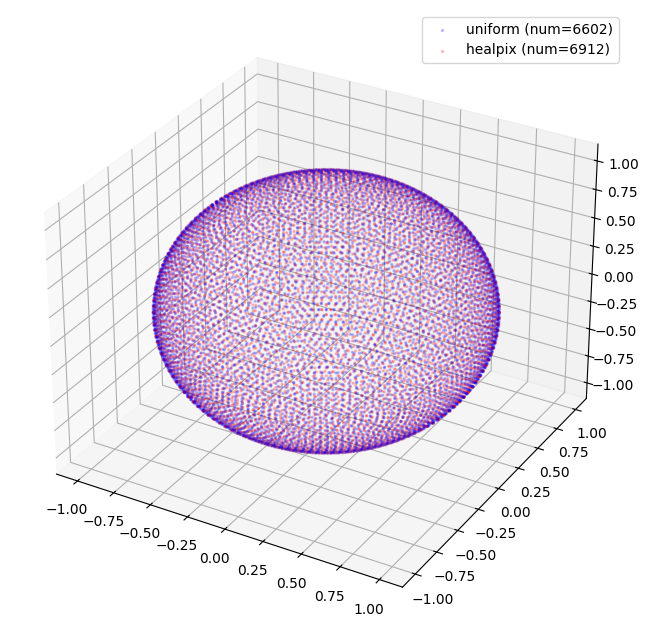

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

fig, ax = plot_s2_grid(
    theta_phi_pairs_uniform,
    fig,
    ax,
    s=2,
    alpha=0.2,
    color="b",
    label=f"uniform (num={theta_phi_pairs_uniform.shape[0]})",
)
fig, ax = plot_s2_grid(
    theta_phi_pairs_healpix,
    fig,
    ax,
    s=2,
    alpha=0.2,
    color="r",
    label=f"healpix (num={theta_phi_pairs_healpix.shape[0]})",
)
plt.legend()
plt.show()